In [2]:
from glob import glob 
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imageio

input_dataset_path = './Data/Original/'
output_dataset_path = './Data/Output/'

./Data/Original/GT/1001-19-49-28.653.png
./Data/Original/metalens/1001-19-49-28.601.png


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.78039217
0.7490196228027344
0.7490196228027344


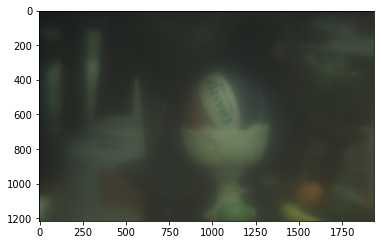

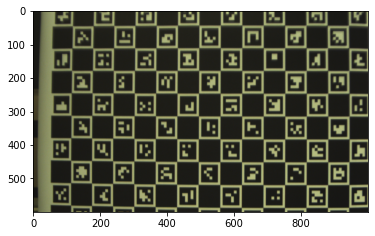

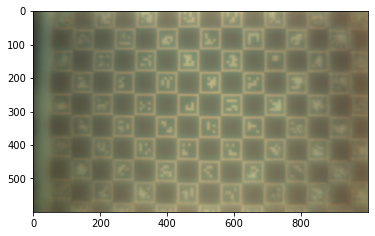

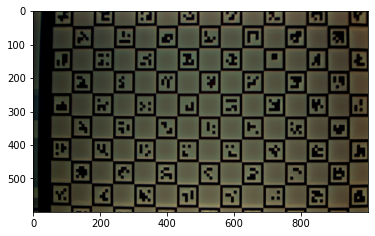

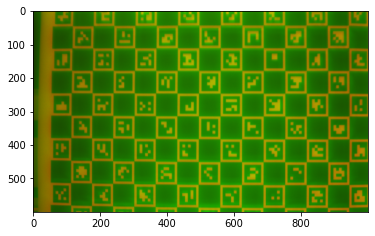

In [27]:
gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
print(gt_path_list[0])
print(meta_path_list[0])

def cvt_raw2rgb(img_path):
    imageRaw = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE | cv2.IMREAD_ANYDEPTH)
    img_bgr = cv2.cvtColor(imageRaw, cv2.COLOR_BAYER_BG2BGR)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    return img_rgb

img_gt = cvt_raw2rgb(meta_path_list[0])
plt.imshow(img_gt)


def images_alignment(img_gt,img_meta):
    img_meta = np.fliplr(img_meta)
    # Crop FoV
    img_gt = img_gt[205:890,20:1230]
    img_meta = img_meta[80:,:]
    # Match GT size to Meta
    w,h,c = img_meta.shape
    #print(w,h)
    w = 600
    h = 1000
    img_gt = cv2.resize(img_gt,(h,w))
    img_meta = cv2.resize(img_meta,(h,w))

    return img_gt, img_meta

i = 1
img_gt = cvt_raw2rgb(gt_path_list[i])
img_meta = cvt_raw2rgb(meta_path_list[i])

img_gt = plt.imread('./Data/Original/gt.png')
img_meta = plt.imread('./Data/Original/metalens.png')
print(img_gt.max())
img_gt,img_meta = images_alignment(img_gt,img_meta)

img_new = np.zeros(img_gt.shape)#.astype(np.uint8)
img_new[...,0] = img_gt[...,0]
print(img_new[...,0].max())
img_new[...,1] = img_meta[...,1]
print(img_new[...,1:].max())

plt.figure()
plt.imshow(img_gt)
plt.figure()
plt.imshow(img_meta)
plt.figure()
plt.imshow(img_meta-img_gt)
plt.figure()
plt.imshow(img_new)

In [18]:
def generate_dataset(input_dataset_path,output_dataset_path):
    gt_path_list = sorted(glob(input_dataset_path+'GT/*'))
    meta_path_list = sorted(glob(input_dataset_path+'metalens/*'))
    for i in range(0,len(gt_path_list)):
        print(i)
        img_gt = cvt_raw2rgb(gt_path_list[i])
        img_meta = cvt_raw2rgb(meta_path_list[i])
        img_gt,img_meta = images_alignment(img_gt,img_meta)
        imageio.imwrite(output_dataset_path+"GT/{}.png".format(i), np.uint8(img_gt))
        imageio.imwrite(output_dataset_path+"metalens/{}.png".format(i), np.uint8(img_meta))

generate_dataset(input_dataset_path,output_dataset_path)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183


KeyboardInterrupt: 